In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# !pip install Keras
# !pip install Tensorflow

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing                                    

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

### 1. importing data

In [48]:
data = pd.read_csv("forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


### 2.1 getting data ready

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [50]:
#since month and day columns are already encoded. so we have to drop these columns.
data.drop(['month'], axis=1, inplace=True)
data.drop(['day'], axis=1, inplace=True)
data.head() 

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [51]:
#size_category is object data type. let encode this.
label_encoder = preprocessing.LabelEncoder()
data['size_category']= label_encoder.fit_transform(data['size_category'])
data.head()                                                             #small = 1 , large = 0 ; we assign these alphabetically

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [52]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.731141
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2.2 detecting outliers

#### 1) distribution plot

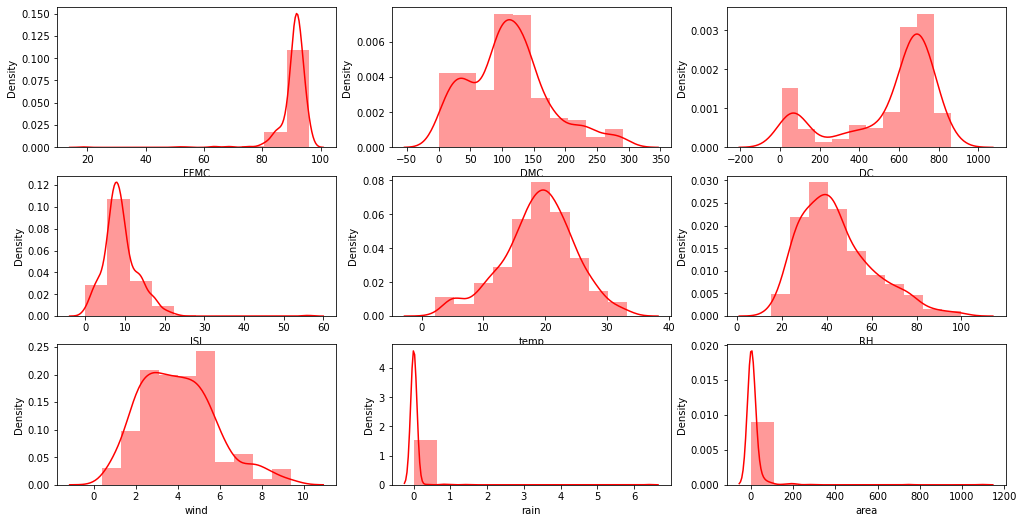

In [53]:
import seaborn as sns

plt.figure(figsize=(17,15)) 

plt.subplot(5,3,1)
sns.distplot(data['FFMC'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,2)
sns.distplot(data['DMC'],bins=10,  kde = True, color =  'red' )
plt.subplot(5,3,3)
sns.distplot(data['DC'],bins=10,  kde = True, color =  'red' )    
plt.subplot(5,3,4)
sns.distplot(data['ISI'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,5)
sns.distplot(data['temp'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,6)
sns.distplot(data['RH'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,7)
sns.distplot(data['wind'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,8)
sns.distplot(data['rain'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,9)
sns.distplot(data['area'],bins=10,  kde = True, color =  'red' )      

plt.show()

#for perfectly skewed N.D. kurtosis = 3

#### 2) isolation forest (detecting outliers)

In [54]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(random_state=10,contamination=.01)
model.fit(data)

y_pred_outliers = model.predict(data)
y_pred_outliers                            #-1 for outliers and 1 for inliers.


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [55]:
data['scores']=model.decision_function(data)
data['anomaly']=model.predict(data.iloc[:,0:29])

data[data['anomaly']==-1]                                     #Print the outlier data points

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,scores,anomaly
276,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,17.85,0,...,0,0,0,0,0,0,0,0,-0.006546,-1
277,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,10.73,0,...,0,0,0,0,0,0,0,0,-0.001707,-1
278,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,22.03,0,...,0,0,0,0,0,0,0,0,-0.008021,-1
279,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77,0,...,0,0,0,0,0,0,0,0,-0.000912,-1
281,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,0,...,0,0,0,0,0,0,0,0,-0.008529,-1
379,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,-0.022647,-1


#### 3)box plot

In [56]:
data = data.iloc[:,0:29]
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


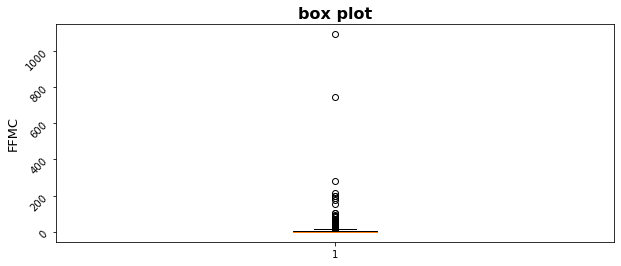

[array([0., 0.]), array([ 6.57, 16.4 ])]

In [57]:
plt.figure(figsize=(10,4))                                                   #setting the frame using figure size
#figsize = plt.figaspect(9/6)                                                #setting the frame using aspect ratio
plt.title("box plot", fontsize = 16, fontweight = "bold")                    #title
plt.ylabel("FFMC", fontsize = 13 )                                           #y-label
plt.yticks( rotation = 45, fontsize = 10)                                    #y-values rotation and font size


#box=plt.boxplot(x='FFMC', data=data)                                               
#box=plt.boxplot(x='DMC', data=data)
#box=plt.boxplot(x='DC', data=data)
#box=plt.boxplot(x='ISI', data=data)
#box=plt.boxplot(x='temp', data=data)
#box=plt.boxplot(x='RH', data=data)
#box=plt.boxplot(x='wind', data=data)
#box=plt.boxplot(x='rain', data=data)
box=plt.boxplot(x='area', data=data)

plt.show() 


[item.get_ydata() for item in box['whiskers']]


In [58]:
## Computing 90th and 10th percentile and replacing the outliers with 90th and 10th percentile as per requirement

p_10 = np.percentile(data['FFMC'], 10)
data.loc[data.FFMC < 86.2, 'FFMC'] = np.nan
data.fillna(p_10,inplace=True)
p_90 = np.percentile(data['DMC'], 90)
data.loc[data.DMC > 248.4, 'DMC'] = np.nan
data.fillna(p_90,inplace=True)
p_10 = np.percentile(data['DC'], 10)
data.loc[data.DC < 25.6, 'DC'] = np.nan
data.fillna(p_10,inplace=True)
p_10 = np.percentile(data['ISI'], 10)
data.loc[data.ISI < 0.4, 'ISI'] = np.nan
data.fillna(p_10,inplace=True)
p_90 = np.percentile(data['ISI'], 90)
data.loc[data.ISI > 17.0, 'ISI'] = np.nan
data.fillna(p_90,inplace=True)
p_10 = np.percentile(data['temp'], 10)
data.loc[data.temp < 4.6, 'temp'] = np.nan
data.fillna(p_10,inplace=True)
p_90 = np.percentile(data['RH'], 90)
data.loc[data.RH > 82.0, 'RH'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['wind'], 90)
data.loc[data.wind > 8.0, 'wind'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['rain'], 90)
data.loc[data.rain > p_90, 'rain'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['rain'], 90)
data.loc[data.rain > p_90, 'rain'] = np.nan
data.fillna(p_90,inplace=True)

### 2.3 Splitting the data

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    float64
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [60]:
x=data.iloc[:,0:28]
y=data.iloc[:,28]

### 3 Tuning of Hyperparameters

#### a) no of neurons, kernel initializer, activation function 

In [40]:
# 1) defining neural network model
def create_model(learning_rate,activation_function,init,neuron1,neuron2):                       #dropout_rate,
    
    model = Sequential()
    
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = init,activation = activation_function))
    #model.add(Dropout(dropout_rate))
    
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    #model.add(Dropout(dropout_rate))
    
    model.add(Dense(1,activation = 'sigmoid'))
    
    
    adam = Adam(lr = learning_rate)
    
    # 2) compiling neural network model    
    
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# 3) defining the sklearn type model
#we cann't directly use a keras model 
#sklearn create a wrapper around keras model. 
#So there is something called KerasClassifier in sklearn that take keras model & convert it into sklearn type of model.
model1 = KerasClassifier(build_fn = create_model,verbose = 0)




# Define the grid search parameters
#batch_size = [10,20,40]
#epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
#dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters
param_grids = dict(learning_rate = learning_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2) 
                       #batch_size = batch_size,epochs = epochs,...,dropout_rate = dropout_rate,



# Build and fit the GridSearchCV
model_cv = GridSearchCV(estimator = model1,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = model_cv.fit(x,y)

#Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))  


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5; 1/324] START activation_function=softmax, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1/324] END activation_function=softmax, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.000 total time=   4.6s
[CV 2/5; 1/324] START activation_function=softmax, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1/324] END activation_function=softmax, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   2.8s
[CV 3/5; 1/324] START activation_function=softmax, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1/324] END activation_function=softmax, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.476 total time=   3.0s
[CV 4/5; 1/324] START activation_function=softmax, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 1/324] END activation_function=softmax, init=uniform, learning_rate=0.001, neuron1=4,

[CV 4/5; 7/324] END activation_function=softmax, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.680 total time=   2.7s
[CV 5/5; 7/324] START activation_function=softmax, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 7/324] END activation_function=softmax, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.301 total time=   3.0s
[CV 1/5; 8/324] START activation_function=softmax, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 8/324] END activation_function=softmax, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=1.000 total time=   2.8s
[CV 2/5; 8/324] START activation_function=softmax, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 2/5; 8/324] END activation_function=softmax, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   2.7s
[CV 3/5; 8/324] START activation_function=softmax, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 3/5; 8/3

[CV 3/5; 14/324] END activation_function=softmax, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.524 total time=   3.0s
[CV 4/5; 14/324] START activation_function=softmax, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 14/324] END activation_function=softmax, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.680 total time=   2.7s
[CV 5/5; 14/324] START activation_function=softmax, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 14/324] END activation_function=softmax, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.718 total time=   2.7s
[CV 1/5; 15/324] START activation_function=softmax, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 15/324] END activation_function=softmax, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=1.000 total time=   2.7s
[CV 2/5; 15/324] START activation_function=softmax, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 15/324] END

[CV 2/5; 21/324] END activation_function=softmax, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.750 total time=   2.7s
[CV 3/5; 21/324] START activation_function=softmax, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 21/324] END activation_function=softmax, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.524 total time=   2.7s
[CV 4/5; 21/324] START activation_function=softmax, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 21/324] END activation_function=softmax, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.680 total time=   2.8s
[CV 5/5; 21/324] START activation_function=softmax, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 5/5; 21/324] END activation_function=softmax, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.699 total time=   2.7s
[CV 1/5; 22/324] START activation_function=softmax, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 22/324] END activat

[CV 1/5; 28/324] END activation_function=softmax, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.000 total time=   2.8s
[CV 2/5; 28/324] START activation_function=softmax, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 28/324] END activation_function=softmax, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   2.7s
[CV 3/5; 28/324] START activation_function=softmax, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 28/324] END activation_function=softmax, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.476 total time=   2.7s
[CV 4/5; 28/324] START activation_function=softmax, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 28/324] END activation_function=softmax, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.320 total time=   2.7s
[CV 5/5; 28/324] START activation_function=softmax, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 28/324] END

[CV 5/5; 34/324] END activation_function=softmax, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.699 total time=   2.7s
[CV 1/5; 35/324] START activation_function=softmax, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 35/324] END activation_function=softmax, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.000 total time=   2.7s
[CV 2/5; 35/324] START activation_function=softmax, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 2/5; 35/324] END activation_function=softmax, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   2.7s
[CV 3/5; 35/324] START activation_function=softmax, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 3/5; 35/324] END activation_function=softmax, init=normal, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.563 total time=   3.0s
[CV 4/5; 35/324] START activation_function=softmax, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 35/

[CV 4/5; 41/324] END activation_function=softmax, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.680 total time=   2.7s
[CV 5/5; 41/324] START activation_function=softmax, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 41/324] END activation_function=softmax, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.699 total time=   2.7s
[CV 1/5; 42/324] START activation_function=softmax, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 42/324] END activation_function=softmax, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.000 total time=   3.4s
[CV 2/5; 42/324] START activation_function=softmax, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 42/324] END activation_function=softmax, init=normal, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.750 total time=   2.7s
[CV 3/5; 42/324] START activation_function=softmax, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 42/324] END activat

[CV 3/5; 48/324] END activation_function=softmax, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.524 total time=   2.8s
[CV 4/5; 48/324] START activation_function=softmax, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 48/324] END activation_function=softmax, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.680 total time=   2.9s
[CV 5/5; 48/324] START activation_function=softmax, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 5/5; 48/324] END activation_function=softmax, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.699 total time=   3.3s
[CV 1/5; 49/324] START activation_function=softmax, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 49/324] END activation_function=softmax, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=1.000 total time=   2.7s
[CV 2/5; 49/324] START activation_function=softmax, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 49/324] END activation_func

[CV 2/5; 55/324] END activation_function=softmax, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   3.5s
[CV 3/5; 55/324] START activation_function=softmax, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 55/324] END activation_function=softmax, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.476 total time=   2.7s
[CV 4/5; 55/324] START activation_function=softmax, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 55/324] END activation_function=softmax, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.680 total time=   2.7s
[CV 5/5; 55/324] START activation_function=softmax, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 55/324] END activation_function=softmax, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.301 total time=   2.7s
[CV 1/5; 56/324] START activation_function=softmax, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 56/324] END activation_func

[CV 1/5; 62/324] END activation_function=softmax, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.000 total time=   3.3s
[CV 2/5; 62/324] START activation_function=softmax, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 2/5; 62/324] END activation_function=softmax, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.750 total time=   2.7s
[CV 3/5; 62/324] START activation_function=softmax, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 3/5; 62/324] END activation_function=softmax, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.524 total time=   2.7s
[CV 4/5; 62/324] START activation_function=softmax, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 62/324] END activation_function=softmax, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.320 total time=   2.7s
[CV 5/5; 62/324] START activation_function=softmax, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 62/324] END activat

[CV 1/5; 69/324] END activation_function=softmax, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=1.000 total time=   2.7s
[CV 2/5; 69/324] START activation_function=softmax, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 69/324] END activation_function=softmax, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.750 total time=   2.7s
[CV 3/5; 69/324] START activation_function=softmax, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 69/324] END activation_function=softmax, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.524 total time=   2.9s
[CV 4/5; 69/324] START activation_function=softmax, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 4/5; 69/324] END activation_function=softmax, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.680 total time=   2.8s
[CV 5/5; 69/324] START activation_function=softmax, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 69/324] END activation_function=sof

[CV 1/5; 76/324] END activation_function=softmax, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=1.000 total time=   2.9s
[CV 2/5; 76/324] START activation_function=softmax, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 76/324] END activation_function=softmax, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.750 total time=   2.8s
[CV 3/5; 76/324] START activation_function=softmax, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 76/324] END activation_function=softmax, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.524 total time=   2.7s
[CV 4/5; 76/324] START activation_function=softmax, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 76/324] END activation_function=softmax, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.680 total time=   2.7s
[CV 5/5; 76/324] START activation_function=softmax, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 76/324] END activation_function=softmax, in

[CV 1/5; 83/324] END activation_function=relu, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.231 total time=   2.7s
[CV 2/5; 83/324] START activation_function=relu, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 83/324] END activation_function=relu, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.750 total time=   2.7s
[CV 3/5; 83/324] START activation_function=relu, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 83/324] END activation_function=relu, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.524 total time=   2.7s
[CV 4/5; 83/324] START activation_function=relu, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 83/324] END activation_function=relu, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.680 total time=   2.7s
[CV 5/5; 83/324] START activation_function=relu, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 83/324] END activation_func

[CV 5/5; 89/324] END activation_function=relu, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4;, score=0.699 total time=   2.7s
[CV 1/5; 90/324] START activation_function=relu, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 90/324] END activation_function=relu, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=1.000 total time=   2.7s
[CV 2/5; 90/324] START activation_function=relu, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 90/324] END activation_function=relu, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.750 total time=   2.7s
[CV 3/5; 90/324] START activation_function=relu, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 3/5; 90/324] END activation_function=relu, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.524 total time=   2.8s
[CV 4/5; 90/324] START activation_function=relu, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 4/5; 90/324] END activat

[CV 5/5; 96/324] END activation_function=relu, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8;, score=0.728 total time=   2.7s
[CV 1/5; 97/324] START activation_function=relu, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 97/324] END activation_function=relu, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=1.000 total time=   2.6s
[CV 2/5; 97/324] START activation_function=relu, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 97/324] END activation_function=relu, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.750 total time=   2.9s
[CV 3/5; 97/324] START activation_function=relu, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 97/324] END activation_function=relu, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.524 total time=   2.6s
[CV 4/5; 97/324] START activation_function=relu, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 4/5; 97/324] END activation_funct

[CV 5/5; 103/324] END activation_function=relu, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=0.699 total time=   2.8s
[CV 1/5; 104/324] START activation_function=relu, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 104/324] END activation_function=relu, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=1.000 total time=   2.8s
[CV 2/5; 104/324] START activation_function=relu, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 104/324] END activation_function=relu, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.750 total time=   2.7s
[CV 3/5; 104/324] START activation_function=relu, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 104/324] END activation_function=relu, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.524 total time=   2.8s
[CV 4/5; 104/324] START activation_function=relu, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 104/324] END activation_function=re

[CV 5/5; 110/324] END activation_function=relu, init=normal, learning_rate=0.001, neuron1=4, neuron2=4;, score=0.709 total time=   2.8s
[CV 1/5; 111/324] START activation_function=relu, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 111/324] END activation_function=relu, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.183 total time=   2.7s
[CV 2/5; 111/324] START activation_function=relu, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 2/5; 111/324] END activation_function=relu, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.731 total time=   2.7s
[CV 3/5; 111/324] START activation_function=relu, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 3/5; 111/324] END activation_function=relu, init=normal, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.524 total time=   2.7s
[CV 4/5; 111/324] START activation_function=relu, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 111/324] END activation_fun

[CV 4/5; 117/324] END activation_function=relu, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.680 total time=   2.7s
[CV 5/5; 117/324] START activation_function=relu, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 117/324] END activation_function=relu, init=normal, learning_rate=0.001, neuron1=16, neuron2=8;, score=0.699 total time=   2.7s
[CV 1/5; 118/324] START activation_function=relu, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 118/324] END activation_function=relu, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=1.000 total time=   2.7s
[CV 2/5; 118/324] START activation_function=relu, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 118/324] END activation_function=relu, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.750 total time=   2.7s
[CV 3/5; 118/324] START activation_function=relu, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 118/324] END activation_funct

[CV 4/5; 124/324] END activation_function=relu, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.680 total time=   2.7s
[CV 5/5; 124/324] START activation_function=relu, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 5/5; 124/324] END activation_function=relu, init=normal, learning_rate=0.01, neuron1=16, neuron2=2;, score=0.728 total time=   2.7s
[CV 1/5; 125/324] START activation_function=relu, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 125/324] END activation_function=relu, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=1.000 total time=   2.9s
[CV 2/5; 125/324] START activation_function=relu, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 125/324] END activation_function=relu, init=normal, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.750 total time=   2.7s
[CV 3/5; 125/324] START activation_function=relu, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 3/5; 125/324] END activation_fun

[CV 4/5; 131/324] END activation_function=relu, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.680 total time=   2.9s
[CV 5/5; 131/324] START activation_function=relu, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 131/324] END activation_function=relu, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=0.699 total time=   2.7s
[CV 1/5; 132/324] START activation_function=relu, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 132/324] END activation_function=relu, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=1.000 total time=   2.6s
[CV 2/5; 132/324] START activation_function=relu, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 132/324] END activation_function=relu, init=normal, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.750 total time=   3.2s
[CV 3/5; 132/324] START activation_function=relu, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 132/324] END activation_function=relu, init

[CV 4/5; 138/324] END activation_function=relu, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.680 total time=   2.7s
[CV 5/5; 138/324] START activation_function=relu, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 138/324] END activation_function=relu, init=zero, learning_rate=0.001, neuron1=4, neuron2=8;, score=0.699 total time=   2.7s
[CV 1/5; 139/324] START activation_function=relu, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 139/324] END activation_function=relu, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=1.000 total time=   2.6s
[CV 2/5; 139/324] START activation_function=relu, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 139/324] END activation_function=relu, init=zero, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.750 total time=   3.2s
[CV 3/5; 139/324] START activation_function=relu, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 139/324] END activation_function=relu, init

[CV 4/5; 145/324] END activation_function=relu, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.680 total time=   2.7s
[CV 5/5; 145/324] START activation_function=relu, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 145/324] END activation_function=relu, init=zero, learning_rate=0.01, neuron1=4, neuron2=2;, score=0.699 total time=   2.6s
[CV 1/5; 146/324] START activation_function=relu, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 146/324] END activation_function=relu, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=1.000 total time=   3.4s
[CV 2/5; 146/324] START activation_function=relu, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 146/324] END activation_function=relu, init=zero, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.750 total time=   2.8s
[CV 3/5; 146/324] START activation_function=relu, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 146/324] END activation_function=relu, init=zero, l

[CV 4/5; 152/324] END activation_function=relu, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.680 total time=   2.7s
[CV 5/5; 152/324] START activation_function=relu, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 152/324] END activation_function=relu, init=zero, learning_rate=0.01, neuron1=16, neuron2=4;, score=0.699 total time=   2.9s
[CV 1/5; 153/324] START activation_function=relu, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 153/324] END activation_function=relu, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=1.000 total time=   2.7s
[CV 2/5; 153/324] START activation_function=relu, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 153/324] END activation_function=relu, init=zero, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.750 total time=   3.2s
[CV 3/5; 153/324] START activation_function=relu, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 3/5; 153/324] END activation_function=relu, init

[CV 5/5; 159/324] END activation_function=relu, init=zero, learning_rate=0.1, neuron1=8, neuron2=8;, score=0.699 total time=   2.9s
[CV 1/5; 160/324] START activation_function=relu, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 1/5; 160/324] END activation_function=relu, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=1.000 total time=   2.7s
[CV 2/5; 160/324] START activation_function=relu, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 2/5; 160/324] END activation_function=relu, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.750 total time=   2.6s
[CV 3/5; 160/324] START activation_function=relu, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 3/5; 160/324] END activation_function=relu, init=zero, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.524 total time=   3.3s
[CV 4/5; 160/324] START activation_function=relu, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 160/324] END activation_function=relu, init=zero, le

[CV 5/5; 166/324] END activation_function=tanh, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2;, score=0.699 total time=   2.7s
[CV 1/5; 167/324] START activation_function=tanh, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 167/324] END activation_function=tanh, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=1.000 total time=   2.7s
[CV 2/5; 167/324] START activation_function=tanh, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 167/324] END activation_function=tanh, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   2.9s
[CV 3/5; 167/324] START activation_function=tanh, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 3/5; 167/324] END activation_function=tanh, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.534 total time=   2.7s
[CV 4/5; 167/324] START activation_function=tanh, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 167/324] END activa

[CV 4/5; 173/324] END activation_function=tanh, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.680 total time=   2.7s
[CV 5/5; 173/324] START activation_function=tanh, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 173/324] END activation_function=tanh, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=0.699 total time=   2.7s
[CV 1/5; 174/324] START activation_function=tanh, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 174/324] END activation_function=tanh, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=   2.9s
[CV 2/5; 174/324] START activation_function=tanh, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 174/324] END activation_function=tanh, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.750 total time=   2.7s
[CV 3/5; 174/324] START activation_function=tanh, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 3/5; 174/324] END activation_fun

[CV 3/5; 180/324] END activation_function=tanh, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.534 total time=   2.7s
[CV 4/5; 180/324] START activation_function=tanh, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 4/5; 180/324] END activation_function=tanh, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.680 total time=   2.9s
[CV 5/5; 180/324] START activation_function=tanh, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 180/324] END activation_function=tanh, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8;, score=0.699 total time=   2.7s
[CV 1/5; 181/324] START activation_function=tanh, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 181/324] END activation_function=tanh, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=1.000 total time=   2.7s
[CV 2/5; 181/324] START activation_function=tanh, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 181/324] END activation_f

[CV 3/5; 187/324] END activation_function=tanh, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.534 total time=   2.9s
[CV 4/5; 187/324] START activation_function=tanh, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 187/324] END activation_function=tanh, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.680 total time=   2.7s
[CV 5/5; 187/324] START activation_function=tanh, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 187/324] END activation_function=tanh, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2;, score=0.699 total time=   2.9s
[CV 1/5; 188/324] START activation_function=tanh, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 188/324] END activation_function=tanh, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4;, score=1.000 total time=   2.7s
[CV 2/5; 188/324] START activation_function=tanh, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 188/324] END activation_fun

[CV 2/5; 194/324] END activation_function=tanh, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.750 total time=   2.8s
[CV 3/5; 194/324] START activation_function=tanh, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 3/5; 194/324] END activation_function=tanh, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.524 total time=   2.8s
[CV 4/5; 194/324] START activation_function=tanh, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 194/324] END activation_function=tanh, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.680 total time=   3.3s
[CV 5/5; 194/324] START activation_function=tanh, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 194/324] END activation_function=tanh, init=normal, learning_rate=0.001, neuron1=8, neuron2=4;, score=0.699 total time=   2.7s
[CV 1/5; 195/324] START activation_function=tanh, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 195/324] END activation_fun

[CV 1/5; 201/324] END activation_function=tanh, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=1.000 total time=   2.7s
[CV 2/5; 201/324] START activation_function=tanh, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 201/324] END activation_function=tanh, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.750 total time=   2.7s
[CV 3/5; 201/324] START activation_function=tanh, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 3/5; 201/324] END activation_function=tanh, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.524 total time=   2.7s
[CV 4/5; 201/324] START activation_function=tanh, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 4/5; 201/324] END activation_function=tanh, init=normal, learning_rate=0.01, neuron1=4, neuron2=8;, score=0.680 total time=   2.7s
[CV 5/5; 201/324] START activation_function=tanh, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 201/324] END activation_function=ta

[CV 1/5; 208/324] END activation_function=tanh, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=1.000 total time=   2.7s
[CV 2/5; 208/324] START activation_function=tanh, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 208/324] END activation_function=tanh, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.750 total time=   2.7s
[CV 3/5; 208/324] START activation_function=tanh, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 208/324] END activation_function=tanh, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.524 total time=   2.8s
[CV 4/5; 208/324] START activation_function=tanh, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 208/324] END activation_function=tanh, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=0.680 total time=   2.7s
[CV 5/5; 208/324] START activation_function=tanh, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 208/324] END activation_function=tanh, init

[CV 1/5; 215/324] END activation_function=tanh, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=1.000 total time=   2.7s
[CV 2/5; 215/324] START activation_function=tanh, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 215/324] END activation_function=tanh, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.750 total time=   2.8s
[CV 3/5; 215/324] START activation_function=tanh, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 215/324] END activation_function=tanh, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.524 total time=   2.7s
[CV 4/5; 215/324] START activation_function=tanh, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 215/324] END activation_function=tanh, init=normal, learning_rate=0.1, neuron1=16, neuron2=4;, score=0.680 total time=   2.7s
[CV 5/5; 215/324] START activation_function=tanh, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 215/324] END activation_function=ta

[CV 1/5; 222/324] END activation_function=tanh, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=1.000 total time=   2.7s
[CV 2/5; 222/324] START activation_function=tanh, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 222/324] END activation_function=tanh, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.750 total time=   2.7s
[CV 3/5; 222/324] START activation_function=tanh, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 222/324] END activation_function=tanh, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.524 total time=   2.7s
[CV 4/5; 222/324] START activation_function=tanh, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 222/324] END activation_function=tanh, init=zero, learning_rate=0.001, neuron1=8, neuron2=8;, score=0.680 total time=   2.7s
[CV 5/5; 222/324] START activation_function=tanh, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 222/324] END activation_function=tanh, init

[CV 1/5; 229/324] END activation_function=tanh, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=1.000 total time=   3.3s
[CV 2/5; 229/324] START activation_function=tanh, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 229/324] END activation_function=tanh, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.750 total time=   2.7s
[CV 3/5; 229/324] START activation_function=tanh, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 229/324] END activation_function=tanh, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.524 total time=   2.8s
[CV 4/5; 229/324] START activation_function=tanh, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 229/324] END activation_function=tanh, init=zero, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.680 total time=   3.0s
[CV 5/5; 229/324] START activation_function=tanh, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 229/324] END activation_function=tanh, init=zero, l

[CV 1/5; 236/324] END activation_function=tanh, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=1.000 total time=   2.7s
[CV 2/5; 236/324] START activation_function=tanh, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 236/324] END activation_function=tanh, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.750 total time=   2.8s
[CV 3/5; 236/324] START activation_function=tanh, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 236/324] END activation_function=tanh, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.524 total time=   3.5s
[CV 4/5; 236/324] START activation_function=tanh, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 236/324] END activation_function=tanh, init=zero, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.680 total time=   2.7s
[CV 5/5; 236/324] START activation_function=tanh, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 236/324] END activation_function=tanh, init=zero, learning_

[CV 2/5; 243/324] END activation_function=tanh, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.750 total time=   2.7s
[CV 3/5; 243/324] START activation_function=tanh, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 243/324] END activation_function=tanh, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.524 total time=   2.7s
[CV 4/5; 243/324] START activation_function=tanh, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 243/324] END activation_function=tanh, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.680 total time=   2.7s
[CV 5/5; 243/324] START activation_function=tanh, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 243/324] END activation_function=tanh, init=zero, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.699 total time=   3.4s
[CV 1/5; 244/324] START activation_function=linear, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 244/324] END activation_function=linear, init

[CV 1/5; 250/324] END activation_function=linear, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=1.000 total time=   2.7s
[CV 2/5; 250/324] START activation_function=linear, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 250/324] END activation_function=linear, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.548 total time=   2.7s
[CV 3/5; 250/324] START activation_function=linear, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 3/5; 250/324] END activation_function=linear, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.524 total time=   2.7s
[CV 4/5; 250/324] START activation_function=linear, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 250/324] END activation_function=linear, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.680 total time=   2.7s
[CV 5/5; 250/324] START activation_function=linear, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 

[CV 5/5; 256/324] END activation_function=linear, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=0.767 total time=   2.7s
[CV 1/5; 257/324] START activation_function=linear, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 257/324] END activation_function=linear, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=1.000 total time=   2.7s
[CV 2/5; 257/324] START activation_function=linear, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 257/324] END activation_function=linear, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.808 total time=   2.6s
[CV 3/5; 257/324] START activation_function=linear, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 257/324] END activation_function=linear, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.563 total time=   2.7s
[CV 4/5; 257/324] START activation_function=linear, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 257/324] EN

[CV 4/5; 263/324] END activation_function=linear, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.680 total time=   3.1s
[CV 5/5; 263/324] START activation_function=linear, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 263/324] END activation_function=linear, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.301 total time=   3.5s
[CV 1/5; 264/324] START activation_function=linear, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 264/324] END activation_function=linear, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.000 total time=   2.7s
[CV 2/5; 264/324] START activation_function=linear, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 264/324] END activation_function=linear, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.750 total time=   2.6s
[CV 3/5; 264/324] START activation_function=linear, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 264/324] END activa

[CV 3/5; 270/324] END activation_function=linear, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.534 total time=   2.7s
[CV 4/5; 270/324] START activation_function=linear, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 270/324] END activation_function=linear, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.689 total time=   2.8s
[CV 5/5; 270/324] START activation_function=linear, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 270/324] END activation_function=linear, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.699 total time=   2.7s
[CV 1/5; 271/324] START activation_function=linear, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 271/324] END activation_function=linear, init=normal, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   2.8s
[CV 2/5; 271/324] START activation_function=linear, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 271/324] EN

[CV 2/5; 277/324] END activation_function=linear, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.635 total time=   3.0s
[CV 3/5; 277/324] START activation_function=linear, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 3/5; 277/324] END activation_function=linear, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.680 total time=   2.7s
[CV 4/5; 277/324] START activation_function=linear, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 277/324] END activation_function=linear, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.631 total time=   2.7s
[CV 5/5; 277/324] START activation_function=linear, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 277/324] END activation_function=linear, init=normal, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.641 total time=   2.7s
[CV 1/5; 278/324] START activation_function=linear, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 278

[CV 1/5; 284/324] END activation_function=linear, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=1.000 total time=   3.0s
[CV 2/5; 284/324] START activation_function=linear, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 284/324] END activation_function=linear, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.423 total time=   2.7s
[CV 3/5; 284/324] START activation_function=linear, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 284/324] END activation_function=linear, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.534 total time=   3.3s
[CV 4/5; 284/324] START activation_function=linear, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 284/324] END activation_function=linear, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.699 total time=   2.6s
[CV 5/5; 284/324] START activation_function=linear, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 284/324] END activa

[CV 5/5; 290/324] END activation_function=linear, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=0.388 total time=   2.7s
[CV 1/5; 291/324] START activation_function=linear, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 291/324] END activation_function=linear, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.000 total time=   2.7s
[CV 2/5; 291/324] START activation_function=linear, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 291/324] END activation_function=linear, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.740 total time=   2.7s
[CV 3/5; 291/324] START activation_function=linear, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 291/324] END activation_function=linear, init=normal, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.602 total time=   2.6s
[CV 4/5; 291/324] START activation_function=linear, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 291/324] END activation_fun

[CV 4/5; 297/324] END activation_function=linear, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.379 total time=   3.3s
[CV 5/5; 297/324] START activation_function=linear, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 297/324] END activation_function=linear, init=normal, learning_rate=0.1, neuron1=16, neuron2=8;, score=0.728 total time=   2.7s
[CV 1/5; 298/324] START activation_function=linear, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 298/324] END activation_function=linear, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=1.000 total time=   2.6s
[CV 2/5; 298/324] START activation_function=linear, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 298/324] END activation_function=linear, init=zero, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.750 total time=   2.7s
[CV 3/5; 298/324] START activation_function=linear, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 298/324] END activation_

[CV 3/5; 304/324] END activation_function=linear, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.524 total time=   2.7s
[CV 4/5; 304/324] START activation_function=linear, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 304/324] END activation_function=linear, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.680 total time=   2.6s
[CV 5/5; 304/324] START activation_function=linear, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 304/324] END activation_function=linear, init=zero, learning_rate=0.001, neuron1=16, neuron2=2;, score=0.699 total time=   2.6s
[CV 1/5; 305/324] START activation_function=linear, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 305/324] END activation_function=linear, init=zero, learning_rate=0.001, neuron1=16, neuron2=4;, score=1.000 total time=   2.7s
[CV 2/5; 305/324] START activation_function=linear, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 2/5; 305/324] END activa

[CV 3/5; 311/324] END activation_function=linear, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.524 total time=   2.6s
[CV 4/5; 311/324] START activation_function=linear, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 311/324] END activation_function=linear, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.680 total time=   2.6s
[CV 5/5; 311/324] START activation_function=linear, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 311/324] END activation_function=linear, init=zero, learning_rate=0.01, neuron1=8, neuron2=4;, score=0.699 total time=   3.0s
[CV 1/5; 312/324] START activation_function=linear, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 312/324] END activation_function=linear, init=zero, learning_rate=0.01, neuron1=8, neuron2=8;, score=1.000 total time=   2.7s
[CV 2/5; 312/324] START activation_function=linear, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 312/324] END activation_function=li

[CV 3/5; 318/324] END activation_function=linear, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.524 total time=   3.3s
[CV 4/5; 318/324] START activation_function=linear, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 318/324] END activation_function=linear, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.680 total time=   2.9s
[CV 5/5; 318/324] START activation_function=linear, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 5/5; 318/324] END activation_function=linear, init=zero, learning_rate=0.1, neuron1=4, neuron2=8;, score=0.699 total time=   2.6s
[CV 1/5; 319/324] START activation_function=linear, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 319/324] END activation_function=linear, init=zero, learning_rate=0.1, neuron1=8, neuron2=2;, score=1.000 total time=   2.7s
[CV 2/5; 319/324] START activation_function=linear, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 319/324] END activation_function=linear, in

In [41]:
#best : 
       # 1. activation function = 'linear'
       # 2. kernel initializer = 'uniform'
       # 3. learning rate = 0.01
       # 4. neuron1 = 8
       # 5. neuron2 = 8

#### b) batch size, epochs

In [18]:
# 1) defining neural network model
def create_model():                       
    
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = 'uniform',activation = 'linear'))
    #model.add(Dropout(dropout_rate))
    model.add(Dense(8,input_dim = 8,kernel_initializer = 'uniform',activation = 'linear'))
    #model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    adam = Adam(lr = 0.01)
    
    # 2) compiling neural network model    
    
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# 3) defining the sklearn type model
#we cann't directly use a keras model 
#sklearn create a wrapper around keras model. 
#So there is something called KerasClassifier in sklearn that take keras model & convert it into sklearn type of model.
model1 = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
#learning_rate = [0.001,0.01,0.1]
#dropout_rate = [0.0,0.1,0.2]
#activation_function = ['softmax','relu','tanh','linear']
#init = ['uniform','normal','zero']
#neuron1 = [4,8,16]
#neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters
param_grids = dict(batch_size = batch_size,epochs = epochs)                #dropout_rate = dropout_rate,
                   


# Build and fit the GridSearchCV
model_cv = GridSearchCV(estimator = model1,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = model_cv.fit(x,y)

#Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))  


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=   7.2s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.750 total time=   4.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.524 total time=   4.2s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.680 total time=   4.6s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.301 total time=   4.2s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.524 total time=   7.2s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.320 total time=   6.9s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.699 total time=   7.5s
Best : 0.7208737850189209, using {'batch_size': 10, 'epochs': 50}
0.45097087025642396,0.27310905134889035 with: {'batch_size': 10, 'epochs': 10}
0.7208737850189209,0.16794994181639633 with: {'batch_size': 10, 'epochs': 50}
0.45097087025642396,0.27310905134889035 with: {'batch_size': 10, 'epochs': 100}
0.5383495092391968,0.2760441912507745 with: {'batch_size': 20, 'epochs': 10}
0.650970870256424,0.232809376585483 with: {'batch_size': 20, 'epochs': 50}
0.4587378680706024,0.27438996059348447 with: {'batch_size': 20, 'epochs': 100}
0.6305825233459472,0.24482772813004766 with: {'batch_size': 4

In [19]:
#best :
       # 1. batch size = 10
       # 2. epochs = 50

#### c) dropout rate

In [21]:
# 1) defining neural network model
def create_model(dropout_rate):     #in the function argument please do write dropout rate otherwise it will give not a legal parameter error               
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8,input_dim = 8,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    adam = Adam(lr = 0.01)
    
    # 2) compiling neural network model    
    
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# 3) defining the sklearn type model
#we cann't directly use a keras model 
#sklearn create a wrapper around keras model. 
#So there is something called KerasClassifier in sklearn that take keras model & convert it into sklearn type of model.
model1 = KerasClassifier(build_fn = create_model,verbose = 0, batch_size = 10,epochs = 50)


# Define the grid search parameters
#batch_size = [10,20,40]
#epochs = [10,50,100]
#learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.001,0.1,0.0001]
#activation_function = ['softmax','relu','tanh','linear']
#init = ['uniform','normal','zero']
#neuron1 = [4,8,16]
#neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters
param_grids = dict(dropout_rate = dropout_rate)                
                   


# Build and fit the GridSearchCV
model_cv = GridSearchCV(estimator = model1,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = model_cv.fit(x,y)

#Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))  


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START dropout_rate=0.0............................................
[CV 1/5; 1/4] END .............dropout_rate=0.0;, score=0.000 total time=  10.3s
[CV 2/5; 1/4] START dropout_rate=0.0............................................
[CV 2/5; 1/4] END .............dropout_rate=0.0;, score=0.750 total time=  10.4s
[CV 3/5; 1/4] START dropout_rate=0.0............................................
[CV 3/5; 1/4] END .............dropout_rate=0.0;, score=0.524 total time=  10.2s
[CV 4/5; 1/4] START dropout_rate=0.0............................................
[CV 4/5; 1/4] END .............dropout_rate=0.0;, score=0.680 total time=  10.3s
[CV 5/5; 1/4] START dropout_rate=0.0............................................
[CV 5/5; 1/4] END .............dropout_rate=0.0;, score=0.699 total time=  10.4s
[CV 1/5; 2/4] START dropout_rate=0.001..........................................
[CV 1/5; 2/4] END ...........dropout_rate=0.001;,

In [66]:
# best : 
        # a) dropout rate = 0.0001

### 4 building neural network model

In [61]:
# 1) defining neural network model
model = Sequential()
model.add(Dense(8,input_dim = 28,kernel_initializer = 'uniform',activation = 'linear'))
model.add(Dropout(0.0001))
model.add(Dense(8,input_dim = 8,kernel_initializer = 'uniform',activation = 'linear'))
model.add(Dropout(0.0001))
model.add(Dense(1,activation = 'linear'))
adam = Adam(lr = 0.01)
    
# 2) compiling neural network model    
model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    

# 3) Fit the model
model.fit(x, y, validation_split=0.33, epochs=50, batch_size=10)


Epoch 1/50
35/35 [==============================] - 3s 26ms/step - loss: 3.6353 - accuracy: 0.7514 - val_loss: 4.9047 - val_accuracy: 0.6784
Epoch 2/50
35/35 [==============================] - 0s 9ms/step - loss: 3.7021 - accuracy: 0.7572 - val_loss: 4.9047 - val_accuracy: 0.6784
Epoch 3/50
35/35 [==============================] - 0s 9ms/step - loss: 3.7021 - accuracy: 0.7572 - val_loss: 4.9047 - val_accuracy: 0.6784
Epoch 4/50
35/35 [==============================] - 0s 9ms/step - loss: 3.7021 - accuracy: 0.7572 - val_loss: 4.9047 - val_accuracy: 0.6784
Epoch 5/50
35/35 [==============================] - 0s 9ms/step - loss: 3.7021 - accuracy: 0.7572 - val_loss: 4.9047 - val_accuracy: 0.6784
Epoch 6/50
35/35 [==============================] - 0s 9ms/step - loss: 3.7021 - accuracy: 0.7572 - val_loss: 4.9047 - val_accuracy: 0.6784
Epoch 7/50
35/35 [==============================] - 0s 9ms/step - loss: 3.7021 - accuracy: 0.7572 - val_loss: 4.9047 - val_accuracy: 0.6784
Epoch 8/50
35/35 [=

In [62]:
# evaluate the model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 6ms/step - loss: 4.0999 - accuracy: 0.7311
accuracy: 73.11%


In [63]:
# Visualize training history

# list all data in history
model.history.history.keys()

dict_keys([])

In [64]:
model.metrics_names

['loss', 'accuracy']

In [66]:
summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_348/2546830045.py, line 1)